In this project, we will analyze the factors influencing employee retention—whether employees leave or stay in a company—using machine learning techniques, including Random Forest classifiers. A central focus of this project is enhancing explainability through advanced tools like the TED_CartesianExplainer, empowering decision-makers to understand not only the predictions but also the reasons behind them.

Explainable AI (XAI) is critical in real-world applications where decisions impact people and businesses. By using domain-relevant explanations (TED), this project demonstrates how to interpret and trust model predictions effectively. Learners will gain hands-on experience in building interpretable machine learning pipelines, addressing data preprocessing challenges, and evaluating explainability outputs.

This project provides a comprehensive guide to integrating advanced explainability techniques into machine learning workflows, ensuring fair, interpretable, and actionable outcomes for business decision-making.


Refer to the following links for detailed documentation and resources:

- [IBM AI Explainability 360 (AIX360)](https://aix360.res.ibm.com/?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-xai_heloc_practice-v1_1732308887)
- [IBM AIX360 Github](https://github.com/Trusted-AI/AIX360)
- [IBM AIX360 Documentation](https://aix360.readthedocs.io/_/downloads/en/latest/pdf/)
- [AIX360 Proactive Retention Tutorial](https://github.com/Trusted-AI/AIX360/blob/master/examples/tutorials/retention.ipynb).


## <a id='objectives'></a>[Objectives](#toc)

By the end of this project, you will be able to:

1. **Set up the environment**: For working with explainable AI (XAI) methods on an employee retention dataset.

2. **Load and explore the employee retention dataset**: Understand the features influencing employee decisions to stay or leave, such as salary, department, and workload.

3. **Apply XAI techniques to enhance interpretability**: Use explainability methods such as TED_CartesianExplainer.

4. **Evaluate model interpretability**: Analyze the contribution of the XAI method in making predictions transparent and actionable for decision-makers.

This project will provide practical skills to integrate XAI techniques into machine learning workflows, focusing on actionable insights for improving employee retention strategies.


## <a id='setup'></a>[Setup](#toc)

For this lab, we will be using the following libraries:

- [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01): for managing and analyzing structured data.
- [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01): for numerical computations.
- [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01): for machine learning and pipeline functions, including:
- [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01): for creating visually appealing data visualizations.
- [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01): for additional plotting tools.
- [`shap`](https://shap.readthedocs.io/en/latest/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01): for SHAP-based local explainability.
- [`AIX360`](https://aix360.readthedocs.io/en/latest/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01): for advanced explainability methods:


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from aix360.algorithms.ted import TED_CartesianExplainer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import shap
from ibm_watsonx_ai import APIClient, Credentials
from ibm_watsonx_ai.foundation_models.inference import ModelInference
from ibm_watsonx_ai.metanames import GenTextParamsMetaNames as GenParams
from ibm_watsonx_ai.foundation_models.utils.enums import DecodingMethods

## <a id='background'></a>[Background](#toc)

This tutorial uses the **Employee Retention** dataset. The dataset contains information about employees, such as their salary, department, and workload, with the target variable indicating whether an employee stayed or left the company. The goal is to analyze factors influencing employee retention and provide actionable insights to improve retention strategies.

### Explainability framework: Insights from multiple angles

To make AI-driven insights accessible, we focus on providing explanations that cater to different facets of employee retention analysis:

#### 1. Feature-level explanations

- Feature-level insights help HR professionals understand the impact of specific attributes (e.g., salary, workload) on employee retention.
- The **TED_CartesianExplainer** provides feature-driven explanations, enabling HR teams to pinpoint critical factors contributing to employee attrition.

#### 2. Comprehensive decision-making

- By focusing on feature-level explanations, the analysis equips decision-makers with actionable recommendations to address retention challenges.
- Interpretability ensures that models align with business goals, offering transparency in predictive outcomes.

In the following sections, we will apply these explainability techniques to understand employee retention, providing valuable insights for HR and management teams.


## <a id='data-loading-and-preprocessing'></a>[Data loading and preprocessing](#toc)

We use the pandas library to load the employee retention dataset. The data is stored in a CSV file named `HR-comma-sep.csv`.

We will now load the dataset and inspect the first few rows of the data using pandas `.head()` function.


In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/OZ7t9jYybOTL_3HOQTZ2CA/HR-comma-sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### <a id='dataset-description'></a>[Dataset description](#toc)

Each row in the dataset represents an individual employee, with various features related to their work, performance, and demographics. The dataset is used to analyze factors influencing employee retention.

The `info()` function provides a concise summary of the dataset, including the number of non-null entries, data types, and memory usage. A breakdown of the dataset follows:

| Column                 | Type    | Description                                                                                               | Feature Type                       | 
|------------------------|---------|-----------------------------------------------------------------------------------------------------------|------------------------------------|
| left **(target)**      | Integer | Target variable indicating if the employee left.                                                          | Categorical (0 = stayed, 1 = left) | 
| satisfaction_level     | Float   | Level of job satisfaction (scale: 0 to 1).                                                                | Numerical                          | 
| last_evaluation        | Float   | Performance evaluation score (scale: 0 to 1).                                                             | Numerical                          | 
| number_project         | Integer | Number of projects assigned to the employee.                                                             | Numerical                          |
| average_montly_hours   | Integer | Average number of hours worked per month by the employee.                                                | Numerical                          | 
| time_spend_company     | Integer | Number of years the employee has been with the company.                                                  | Numerical                          | 
| Work_accident          | Integer | Indicator of whether the employee has had a work accident.                                               | Categorical (0 = No, 1 = Yes)      | 
| promotion_last_5years  | Integer | Indicator of whether the employee was promoted in the last 5 years.                                      | Categorical (0 = No, 1 = Yes)      |
| sales                  | Object  | Department in which the employee works (e.g., Sales, HR, etc.).                                          | Categorical (sales, technical, support, IT, ...)                        | 
| salary                 | Object  | Salary category of the employee.                                                                         | Categorical (low, medium, high) |

To learn more about the dataset have a look at this [link](https://www.kaggle.com/datasets/liujiaqi/hr-comma-sepcsv).


### <a id='dataset-description'></a>[Dataset description](#toc)

Each row in the dataset represents an individual employee, with various features related to their work, performance, and demographics. The dataset is used to analyze factors influencing employee retention.

The `info()` function provides a concise summary of the dataset, including the number of non-null entries, data types, and memory usage. A breakdown of the dataset follows:

| Column                 | Type    | Description                                                                                               | Feature Type                       | 
|------------------------|---------|-----------------------------------------------------------------------------------------------------------|------------------------------------|
| left **(target)**      | Integer | Target variable indicating if the employee left.                                                          | Categorical (0 = stayed, 1 = left) | 
| satisfaction_level     | Float   | Level of job satisfaction (scale: 0 to 1).                                                                | Numerical                          | 
| last_evaluation        | Float   | Performance evaluation score (scale: 0 to 1).                                                             | Numerical                          | 
| number_project         | Integer | Number of projects assigned to the employee.                                                             | Numerical                          |
| average_montly_hours   | Integer | Average number of hours worked per month by the employee.                                                | Numerical                          | 
| time_spend_company     | Integer | Number of years the employee has been with the company.                                                  | Numerical                          | 
| Work_accident          | Integer | Indicator of whether the employee has had a work accident.                                               | Categorical (0 = No, 1 = Yes)      | 
| promotion_last_5years  | Integer | Indicator of whether the employee was promoted in the last 5 years.                                      | Categorical (0 = No, 1 = Yes)      |
| sales                  | Object  | Department in which the employee works (e.g., Sales, HR, etc.).                                          | Categorical (sales, technical, support, IT, ...)                        | 
| salary                 | Object  | Salary category of the employee.                                                                         | Categorical (low, medium, high) |

To learn more about the dataset have a look at this [link](https://www.kaggle.com/datasets/liujiaqi/hr-comma-sepcsv).


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [5]:
df['sales'].value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

Similarly for `salary`:


In [6]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

### <a id='data-encoding'></a>[Data encoding](#toc)

To prepare the data for machine learning, we use the `LabelEncoder` from scikit-learn to encode the categorical columns `sales` and `salary` into numeric values. This step ensures that categorical data can be utilized effectively by the model.

Here’s how the categorical values are mapped to numeric values:

#### **Mapping for `sales` Column**
| Original Category | Encoded Value | 
|--------------------|---------------|
| sales             | 7             | 
| technical         | 9             | 
| support           | 8             | 
| IT                | 0             | 
| product_mng       | 6             | 
| marketing         | 5             | 
| RandD             | 1             | 
| accounting        | 2             | 
| hr                | 3             | 
| management        | 4             | 

#### **Mapping for `salary` Column**
| Original Category | Encoded Value | 
|--------------------|---------------|
| low               | 1             | 
| medium            | 2             | 
| high              | 0             |

By encoding the data in this way, we ensure that the machine learning algorithms can process the categorical information effectively while maintaining interpretability.


In [7]:
le = LabelEncoder()
df['salary'] = le.fit_transform(df['salary'])
df['sales'] = le.fit_transform(df['sales']) 

## <a id='model-training'></a>[Model training](#toc)

Let's begin the model training phase by dividing the features and the target column.


In [8]:
# Define features (X) and target (Y)
X = df.drop(columns=['left'])  # 'left' is the target column (1=left, 0=stayed)
y = df['left']

In [9]:
y.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [10]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Let's evaluate the performance of the RandomForestClassifier by testing it on the testing set and visualizing the confusion matrix. This visualization provides a clear breakdown of the model's performance, highlighting the number of correct and incorrect predictions for each class. It offers valuable insights into the classifier's accuracy and identifies potential areas for improvement.

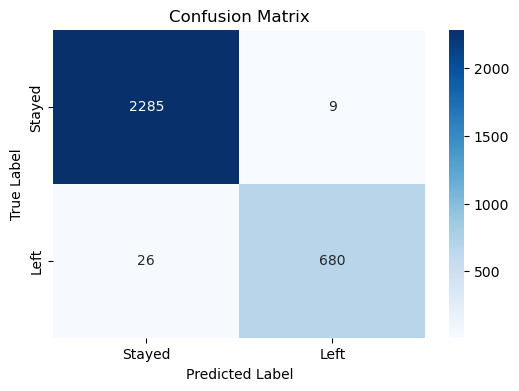

In [12]:
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Insights from the confusion matrix

1. **Correct predictions**:
   - The model correctly predicted **680 employees who left** and **2285 employees who stayed**.

2. **Incorrect predictions**:
   - **False Positives (9)**: Predicted employees would leave, but they stayed.
   - **False Negatives (26)**: Predicted employees would stay, but they left.

3. **Key takeaways**:
   - The model performs well overall, with most predictions being accurate.
   - Reducing false negatives (employees leaving but predicted to stay) should be prioritized, as these cases are critical for improving retention strategies.


### <a id='shap-kernel-explainer'></a>[SHAP KernelExplainer](#toc)

Before going to the `KernelExplainer`, let's learn about SHAP first.

#### 1. **What is SHAP?**
   - **SHAP (SHapley Additive exPlanations)** is a framework that helps us understand machine learning models by explaining their predictions.
   - It assigns importance values to each feature in the data to show how much each feature contributes to a specific prediction.
   - **Why and where do we use SHAP?**
     - SHAP is used to make black-box machine learning models (e.g., Random Forests or Neural Networks) interpretable and understandable.
     - For example, in this project, SHAP helps explain why the model predicts that an employee will leave based on features like salary, satisfaction level, and workload.

#### 2. **What are Shapley values?**
   - Shapley values come from cooperative game theory. They measure how much each "player" (or in our case, each feature) contributes to the "game" (or the model's prediction).
   - Imagine each feature in the dataset is a player contributing to the final prediction. The Shapley value for a feature tells us **how much that feature helps or harms the prediction**, considering all possible combinations of features.
   - **Simple Explanation**:
     - For example, if the prediction is that an employee will leave, Shapley values might tell us that "low satisfaction" contributes 60% to the prediction, "high workload" contributes 30%, and "low salary" contributes 10%.
   - **Why and where do we use Shapley Values?**
     - They allow us to fairly and precisely assign credit to features for their role in a prediction.
     - In this project, Shapley values are used to identify key factors influencing employee retention, making the model's decisions more transparent.
    
#### 3. **What is SHAP KernelExplainer?**
   - The **SHAP KernelExplainer** is a tool within SHAP that works with any type of machine learning model, even the most complex ones like Random Forests or Neural Networks.
   - It calculates Shapley values using **weighted linear regression**, which simplifies how we compute the importance of each feature.
   - We all know about Linear regression, **Weighted Linear Regression** adds a twist: it gives more importance (weight) to certain data points when finding the best-fit line. In KernelExplainer, this helps focus on the most relevant data points for a specific prediction.
   - In our case, it helps calculate how important each feature (e.g., salary, satisfaction) is to the model's decision.

#### **How does it add to the project?**
   - **Feature-Level Insights**: SHAP KernelExplainer tells us exactly how each feature impacts the model’s prediction for an employee (e.g., "low satisfaction level" increases the chance of leaving).
   - **Model Transparency**: It makes the `RandomForestClassifier` more interpretable by explaining why the model makes specific decisions.
   - **Actionable Insights**: By identifying features that drive employee attrition, it helps HR teams focus on areas that need attention (e.g., improving satisfaction or reducing workload).
   - **A Complete Explanation Framework**: Combined with other techniques like Protodash, SHAP KernelExplainer provides a deeper understanding of the model's behavior at the feature level.

In summary, SHAP KernelExplainer is an essential tool in this project, making the predictions interpretable, actionable, and trustworthy. If you want to learn more about SHAP visit their [documentation](https://shap.readthedocs.io/en/latest/).


![shap](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/HS7LoDmOqmCYVMyA5lkzfw/Employee%20Retention.png)


This diagram illustrates how a machine learning model predicts employee retention by analyzing key factors such as **Salary**, **Satisfaction Level**, and **Workload**. These input variables serve as contributors to the model, influencing the prediction outcome.

The core question addressed is: *"How to fairly distribute the prediction's contribution among features influencing employee retention?"* Tools like SHAP can help attribute the model's predictions to these features, providing clear and interpretable insights into why an employee is predicted to leave or stay. This process ensures transparency and actionable insights for HR decision-making.


Here, we initialize the SHAP KernelExplainer.


In [13]:
# Initialize SHAP KernelExplainer
explainer = shap.KernelExplainer(model.predict_proba, shap.kmeans(X_train, 10))  # sampling to reduce computation

Generate SHAP values using the `X_test` to find feature importance.

It may take a minute or two to execute, please be patient.


In [14]:
# Generate SHAP values using the updated approach
shap_values = explainer(X_test)  # This will return an Explanation object

  0%|          | 0/3000 [00:00<?, ?it/s]

After getting the SHAP values, let's visualize the feature importance using `summary_plot` function


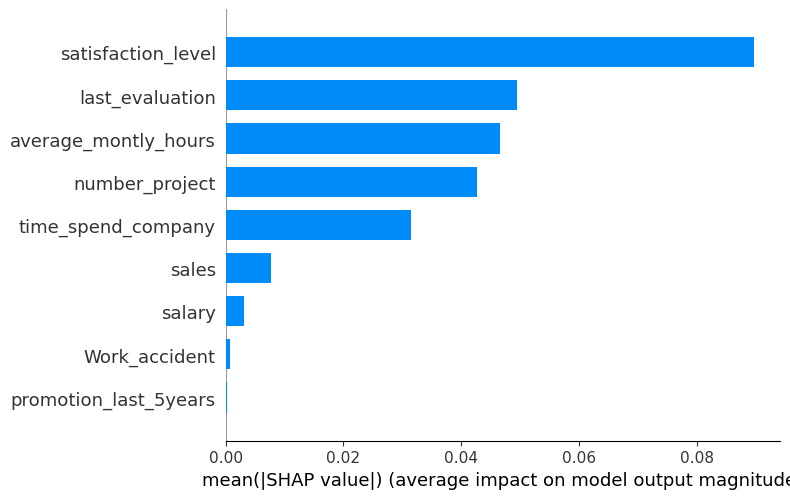

In [15]:
# Plot summary of SHAP values for class 1 (employees who left)
shap.summary_plot(shap_values[...,1], X_test, plot_type="bar", feature_names=X.columns)

The SHAP feature importance plot highlights that **satisfaction level** is the most significant factor influencing employee retention predictions, followed by **last evaluation** and **average monthly hours**. These top features indicate that employee satisfaction and performance metrics play a critical role in predicting attrition. Less impactful features, such as **salary** and **work accidents**, suggest they contribute minimally to the model's predictions in this dataset.

Homework for you: Try to learn more about Shapley values by inspecting them.


#### Random forest feature importance

Random forest is a model that provides feature importance by showing how much each feature contributes to reducing errors in the model. SHAP, on the other hand, explains the impact of each feature on individual predictions. While random forest gives a global view, SHAP provides detailed insights for specific predictions.


                 Feature  Importance
0     satisfaction_level    0.359759
4     time_spend_company    0.183945
2         number_project    0.164631
3   average_montly_hours    0.148849
1        last_evaluation    0.116385
7                  sales    0.012143
8                 salary    0.008177
5          Work_accident    0.005007
6  promotion_last_5years    0.001103


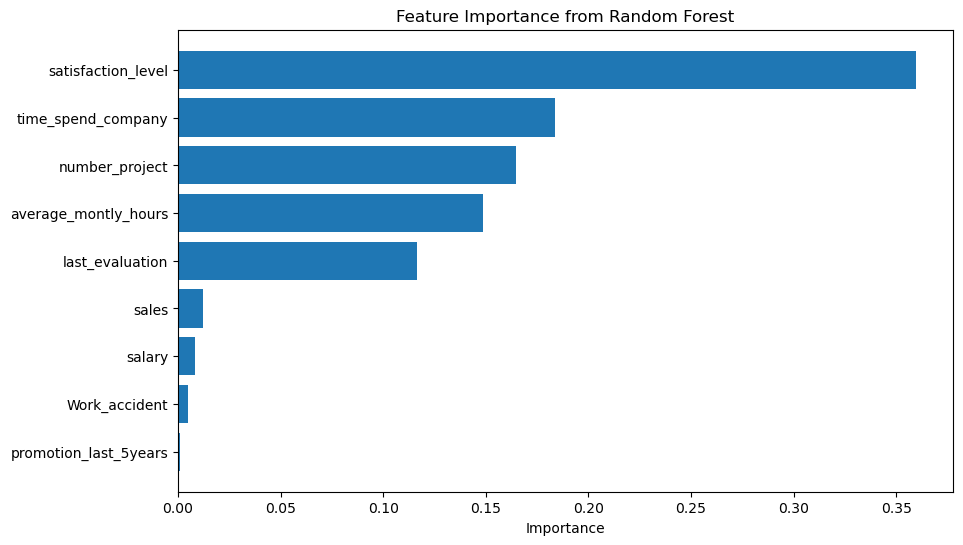

In [16]:
feature_importances = model.feature_importances_
feature_names = X.columns

# Display feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

The Random Forest feature importance plot shows **satisfaction level** as the top predictor of employee retention, followed by **time spent at the company**, **number of projects**, and **average monthly hours**. Less impactful features, like **salary** and **work accidents**, contribute minimally. Both methods highlight similar top features, but SHAP provides deeper insights by explaining how these features impact individual predictions.

Both methods highlight important features, and as seen in the graphs, they often identify similar top features like **satisfaction level** and **average monthly hours**. However, SHAP can go further by explaining how these features specifically impact individual predictions, providing deeper insights into their roles in driving model outcomes.


### <a id='explanation-mapping'></a>[Explanation mapping](#toc)

We define a mapping that links potential reasons for employee attrition to unique explanation codes. The `generate_explanation_code` function aligns SHAP value rankings with prioritized factors (e.g., satisfaction, workload, salary) to identify the primary reason behind each prediction. This ensures the explanation highlights the most impactful factor, offering HR teams clear, actionable insights for addressing retention challenges.


In [17]:
# Define explanation mapping with unique codes for each explanation
expl_mapping = {
    "Low satisfaction level may lead to leaving.": 1,
    "Low performance with a high workload.": 2,
    "High monthly hours may lead to burnout.": 3,
    "Long tenure with no promotion can increase likelihood of leaving.": 4,
    "Low salary is a common reason for attrition.": 5,
    "No strong indicators for leaving.": 0  # Default explanation when no significant factors are found
}

# Generate a single explanation code based on priority
def generate_explanation_code(row):
    # Define priority of explanations: satisfaction > workload > hours > tenure > salary
    if row['satisfaction_level'] < 0.4:
        return expl_mapping["Low satisfaction level may lead to leaving."]
    elif row['last_evaluation'] < 0.5 and row['number_project'] >= 5:
        return expl_mapping["Low performance with a high workload."]
    elif row['average_montly_hours'] > 250:
        return expl_mapping["High monthly hours may lead to burnout."]
    elif row['time_spend_company'] > 3:
        return expl_mapping["Long tenure with no promotion can increase likelihood of leaving."]
    elif row['salary'] == 0:  # low salary
        return expl_mapping["Low salary is a common reason for attrition."]
    else:
        return expl_mapping["No strong indicators for leaving."]

Below is code for applying the mapping to the entire dataset, before moving to the model training.


In [18]:
# Apply to the entire dataset
df['Explanation'] = df.apply(generate_explanation_code, axis=1)

# Display a sample explanation to verify the encoding
print(df['Explanation'].head())

0    1
1    3
2    1
3    4
4    1
Name: Explanation, dtype: int64


We can generate human-readable reasons for why several employees left by first flipping the keys and values of the explanation mapping. This allows us to map explanation codes back to their English descriptions, providing interpretable insights for the first few samples of employees who left.


In [19]:
flipped_dict = {value: key for key, value in expl_mapping.items()}

This filters the rows in the dataframe `df` where `left == 1` (employees who left) and retrieves the first 5 explanation codes from the `Explanation` column as a list.


In [20]:
[flipped_dict[i] for i in df[df['left']==1]['Explanation'].to_list()[0:5]]

['Low satisfaction level may lead to leaving.',
 'High monthly hours may lead to burnout.',
 'Low satisfaction level may lead to leaving.',
 'Long tenure with no promotion can increase likelihood of leaving.',
 'Low satisfaction level may lead to leaving.']

### <a id='training-the-ted-cartesian-explainer-model'></a>[Training the TED_CartesianExplainer model](#toc)

The `TED_CartesianExplainer` is an explainability tool that links machine learning predictions to human-readable explanations. This makes complex models easier to understand for end users, such as HR teams or managers.

#### What is TED_CartesianExplainer?
- It maps features or feature combinations to predefined explanations, helping interpret predictions in context.
- For example, it can explain predictions like "Low satisfaction level may lead to leaving" based on the features' impact.
- It integrates predictions and explanations into a unified framework, ensuring clarity and consistency.

#### How is TED_CartesianExplainer different?
| Aspect                        | TED_CartesianExplainer                                                                                  | Traditional Models                                                                                        |
|-------------------------------|---------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------|
| **Focus on Explanations**     | Provides feature-level insights tied to predictions, making them actionable (e.g., "Low salary impacts attrition"). | Predicts outcomes but does not inherently provide reasons behind predictions.                             |
| **Integration of Explanations** | Combines predictions and explanations into one framework for consistency.                              | Requires additional tools like SHAP or LIME for post-hoc explanations.                                   |
| **Actionable Insights**       | Highlights critical factors for decision-making, aligned with domain knowledge.                        | Focuses on performance but lacks built-in interpretability.                                               |

#### Why use TED for employee retention?
- **Explain Predictions**: Understand why the model predicts an employee might leave or stay.
- **Highlight Key Factors**: Identify critical drivers like low satisfaction or high workload.
- **Build Trust**: Enable HR teams to trust AI predictions with clear, interpretable explanations.

By linking predictions to specific features, `TED_CartesianExplainer` provides actionable insights to address employee retention challenges effectively. If you want to learn more about the model, read the original paper on [Arxiv](https://arxiv.org/pdf/1811.04896).


### <a id='employee-retention-example'></a>[Employee retention example with explanations using TED framework](#toc)

This example demonstrates how the TED framework can be used to classify employee retention predictions and provide meaningful explanations for each decision. It includes the regular dataset, augmented dataset with explanations, and reasoning, along with a new integer label \( Y' \).

| **Feature 1**                | **Feature 2**              | **Feature 3**               | **Label (Y)**             |
|-------------------------------|----------------------------|-----------------------------|----------------------------|
| Low Satisfaction              | High Workload             | Low Salary                 | Left                      |
| High Satisfaction             | Moderate Workload         | High Salary                | Stayed                    |
| Low Satisfaction              | High Workload             | High Salary                | Left                      |
| Moderate Satisfaction         | Moderate Workload         | High Salary                | Stayed                    |
| Low Satisfaction              | Moderate Workload         | Low Salary                 | Left                      |

#### Explanation codes (E)
- **Reason for leaving**: Low satisfaction or high workload.
- **Reason for staying**: High satisfaction and high salary or moderate workload.

#### Augmented dataset with integer labels \( Y' \)
The TED framework assigns a unique integer \( Y' \) to each combination of \( Y \) (decision) and \( E \) (explanation):

| **Feature 1**                | **Feature 2**              | **Feature 3**               | **Label (Y)**             | **Explanation (E)**                         | **Label (Y')**   |
|-------------------------------|----------------------------|-----------------------------|----------------------------|---------------------------------------------|------------------|
| Low Satisfaction              | High Workload             | Low Salary                 | Left                      | Low satisfaction                            | 1                |
| High Satisfaction             | Moderate Workload         | High Salary                | Stayed                    | High satisfaction and high salary           | 3                |
| Low Satisfaction              | High Workload             | High Salary                | Left                      | High workload                               | 2                |
| Moderate Satisfaction         | Moderate Workload         | High Salary                | Stayed                    | Moderate workload                           | 4                |
| Low Satisfaction              | Moderate Workload         | Low Salary                 | Left                      | Low salary                                  | 5                |

We now simply train the model with the new augmented dataset.


Now, let's move on with the training. First, we divide the dataset into three parts, `X` (whole dataset without `left` and `explanation` feature), `Y` (target column `left`) and E (containing all the `Explanation` that we mapped).


In [22]:
# Decompose the dataset into X, Y, E
X = df.drop(columns=['left', 'Explanation'])
Y = df['left']
E = df['Explanation']

In [23]:
# Split into train and test sets
X_train, X_test, Y_train, Y_test, E_train, E_test = train_test_split(X, Y, E, test_size=0.20, random_state=42)

We now initialize the `TED_CartesianExplainer`, a tool from AIX360, with a machine learning model (e.g., `RandomForestClassifier`). This explainer associates the model’s predictions with predefined, human-readable explanations, enabling feature-level insights into why specific predictions were made. By linking features to domain-relevant explanations, it enhances the interpretability and trustworthiness of the model.


In [24]:
estimator = RandomForestClassifier(random_state=42) # Or use DecisionTreeClassifier, SVM, etc.
ted = TED_CartesianExplainer(estimator)

In [25]:
print("Training the classifier")

ted.fit(X_train, Y_train, E_train)   # train classifier

print("Training finished")

Training the classifier
Training finished


### <a id='ted-framework-evaluation'></a>[TED framework evaluation](#toc)

Now, let's evaluate the `TED_CartesianExplainer` by testing it on sample employee data. We'll use predefined feature vectors to simulate predictions and explanations. This step allows us to assess whether the model not only predicts accurately but also provides clear, human-readable explanations, making it a valuable tool for HR decision-making.

#### Label strings
- **IS**: The employee IS at risk of leaving (i.e., the model predicts a high likelihood that this employee will leave the company).
- **IS NOT**: The employee IS NOT at risk of leaving (i.e., the model predicts the employee is likely to stay).


In [26]:
Label_Strings = ["IS", "IS NOT"]

Define function to convert label to string:


In [27]:
def labelToString(label):
    if label == 1:
        return Label_Strings[0]
    else:
        return Label_Strings[1]
    # return Label_Strings[0] if label == 1 else Label_Strings[1]

In [28]:
# List of feature columns used for training
feature_columns = ["satisfaction_level", "last_evaluation", "number_project", 
                   "average_montly_hours", "time_spend_company", 
                   "Work_accident", "promotion_last_5years", "sales", "salary"]

# Example feature vector based on the structure of your HR dataset
# Each row represents values for: 
# [satisfaction_level, last_evaluation, number_project, average_montly_hours, 
#  time_spend_company, Work_accident, promotion_last_5years, sales, salary]
X1 = [[0.38, 0.53, 2, 157, 3, 0, 0, 7, 1]]  # Sample feature vector

# Convert to dataframe because we trained RandomForestClassifier with feature names.
# Providing feature names avoids warnings but is not strictly required.
X1_df = pd.DataFrame(X1, columns=feature_columns)

# Predict label and explanation for Employee #1
Y1, E1 = ted.predict_explain(X1_df)

result_x1 = f"Employee #1 {labelToString(Y1[0])} a retention risk with explanation: {flipped_dict[int(E1[0])]}"
print(result_x1)

Employee #1 IS a retention risk with explanation: Low satisfaction level may lead to leaving.


In [29]:
# Another example
X2 = [[0.80, 0.86, 5, 262, 6, 0, 0, 7, 2]]  # Another sample feature vector

X2_df = pd.DataFrame(X2, columns=feature_columns)

# Predict label and explanation for Employee #2
Y2, E2 = ted.predict_explain(X2_df)

result_x2 = f"Employee #2 {labelToString(Y2[0])} a retention risk with explanation: {flipped_dict[int(E2[0])]}"
print(result_x2)

Employee #2 IS a retention risk with explanation: High monthly hours may lead to burnout.


### <a id='accuracy-of-the-model'></a>[Accuracy of the model](#toc)

We can evaluate the accuracy of the model using the `.score` method. This method assesses the following:

- **Target label accuracy (`Y`)**: Measures how accurately the model predicts the target labels.
- **Explanation accuracy (`E`)**: Evaluates the accuracy of the explanations provided by the model.
- **Combined accuracy (`Y+`)**: Combines the accuracy of predicting both the target labels and their corresponding explanations.

The **Y+ accuracy** reflects how well the classifier performs in making correct predictions while also providing accurate and meaningful explanations. This metric is essential for ensuring that the model's outputs are both reliable and interpretable, building trust and confidence in its decisions.


In [31]:
YE_accuracy, Y_accuracy, E_accuracy = ted.score(X_test, Y_test, E_test)    # evaluate the classifier
print("Evaluating accuracy of TED-enhanced classifier on test data")
print(' Accuracy of predicting Y labels: %.2f%%' % (100*Y_accuracy))
print(' Accuracy of predicting explanations: %.2f%%' % (100*E_accuracy))
print(' Accuracy of predicting Y + explanations: %.2f%%' % (100*YE_accuracy))

Evaluating accuracy of TED-enhanced classifier on test data
 Accuracy of predicting Y labels: 98.77%
 Accuracy of predicting explanations: 99.93%
 Accuracy of predicting Y + explanations: 98.70%


The `TED_CartesianExplainer` achieved **98.77% accuracy** for target labels (`Y`), **99.93% accuracy** for explanations, and **98.70% combined accuracy** for predicting both. This highlights the model's reliability in making accurate predictions and providing meaningful explanations.


### Secret Mission 

Exercise 1: Data loading and preprocessing
To start off, Load the Customer Churn Dataset from https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/LwubmHsv4Nd22Ld1_hfKGg/customer-churn-dataset.csv and explore its structure.

Perform data preprocessing by dropping unnecessary columns and encoding categorical variables into numerical values.



In [54]:
# Load the dataset
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/LwubmHsv4Nd22Ld1_hfKGg/customer-churn-dataset.csv')

# Drop unnecessary columns
data = data.drop(columns=["CustomerID"])

# Encode categorical variables
label_encoders = {}
categorical_columns = ["Gender", "Subscription Type", "Contract Length"]

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

### <a id='exercise-2-prepare-data-for-model-training'></a>[Exercise 2: Prepare data for model training](#toc)

In this exercise, standardize the numerical features of the dataset and split the data into training and testing sets. Train a **Support Vector Machine (SVM)** classifier to predict customer churn and visualize the performance of the model using a confusion matrix heatmap.


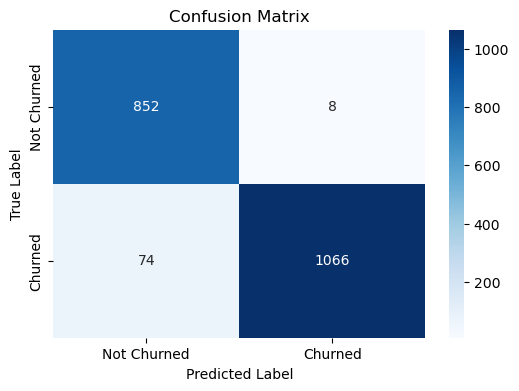

In [57]:

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Separate features and target
X = data.drop(columns=["Churn"])
y = data["Churn"]

# Standardize numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


